In [5]:
from pennylane import qaoa
import pennylane as qml
from pennylane import numpy as np
from matplotlib import pyplot as plt
import networkx as nx


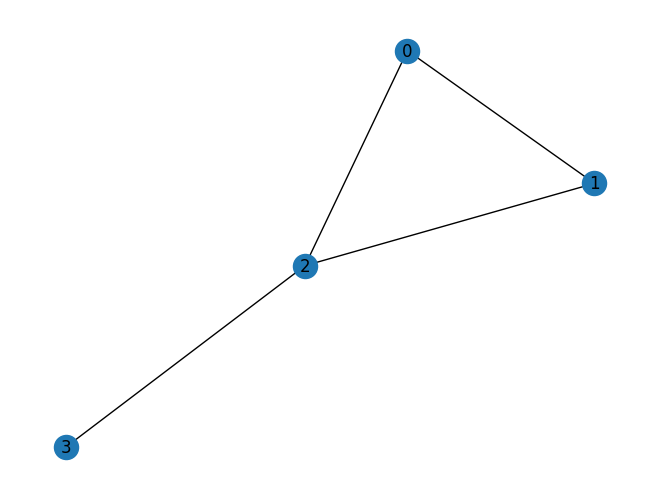

In [2]:
edges = [(0, 1), (1, 2), (2, 0), (2, 3)]
graph = nx.Graph(edges)

nx.draw(graph, with_labels=True)
plt.show()

In [3]:
cost_h, mixer_h = qaoa.min_vertex_cover(graph, constrained=True)

print("Cost Hamiltonian", cost_h)
print("Mixer Hamiltonian", mixer_h)

Cost Hamiltonian   (-1) [Z0]
+ (-1) [Z1]
+ (-1) [Z2]
+ (-1) [Z3]
Mixer Hamiltonian   (0.125) [X2]
+ (0.25) [X0]
+ (0.25) [X1]
+ (0.5) [X3]
+ (-0.5) [X3 Z2]
+ (-0.25) [X0 Z2]
+ (-0.25) [X0 Z1]
+ (-0.25) [X1 Z2]
+ (-0.25) [X1 Z0]
+ (-0.125) [X2 Z3]
+ (-0.125) [X2 Z0]
+ (-0.125) [X2 Z1]
+ (0.125) [X2 Z0 Z3]
+ (0.125) [X2 Z1 Z3]
+ (0.125) [X2 Z1 Z0]
+ (0.25) [X0 Z1 Z2]
+ (0.25) [X1 Z0 Z2]
+ (-0.125) [X2 Z1 Z0 Z3]


In [4]:
def qaoa_layer(gamma, alpha):
    qaoa.cost_layer(gamma, cost_h)
    qaoa.mixer_layer(alpha, mixer_h)

In [5]:
wires = range(4)
depth = 2

def circuit(params, **kwargs):
    for w in wires:
        qml.PauliX(wires=w)
    qml.layer(qaoa_layer, depth, params[0], params[1])


In [6]:
dev = qml.device("default.qubit", wires=wires)

@qml.qnode(dev)
def cost_function(params):
    circuit(params)
    return qml.expval(cost_h)

In [7]:
optimizer = qml.GradientDescentOptimizer()
steps = 70
params = np.array([[0.5, 0.5], [0.5, 0.5]], requires_grad=True)

In [8]:
for i in range(steps):
    params = optimizer.step(cost_function, params)

print("Optimal Parameters")
print(params)

Optimal Parameters
[[0.5        0.00352836]
 [0.49786368 0.75740744]]


In [9]:
@qml.qnode(dev)
def probability_circuit(gamma, alpha):
    circuit([gamma, alpha])
    return qml.probs(wires=wires)


probs = probability_circuit(params[0], params[1])

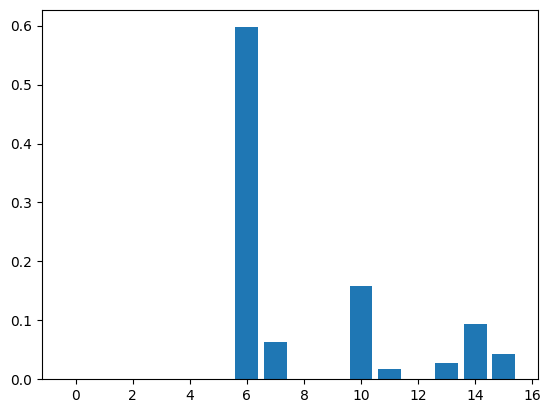

In [10]:

plt.bar(range(2 ** len(wires)), probs)
plt.show()


## 

In [2]:
z = np.array([[1,0],[0,-1]])
i = np.array([[1,0],[0,1]])

z0 = np.kron(np.kron(np.kron(z,i),i),i)
z1 = np.kron(np.kron(np.kron(i,z),i),i)
z2 = np.kron(np.kron(np.kron(i,i),z),i)
z3 = np.kron(np.kron(np.kron(i,i),i),z)

In [3]:
H_p = 0.5*(-(z0+z1+z2+z3)+4*np.kron(np.kron(np.kron(i,i),i),i))


In [4]:
print(H_p)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]


In [5]:
from pennylane import numpy as np
a = np.array([[0.59806352, 0.94198485],
 [0.52797281, 0.85552845]])
b = np.array([[0.5      ,  0.00352836],
 [0.49786368, 0.75740744]])

In [11]:
a = a.reshape(1,4)
b = b.reshape(1,4)

In [13]:
c = a-b

In [17]:
np.matmul(c,np.transpose(c))

tensor([[0.90085133]], requires_grad=True)

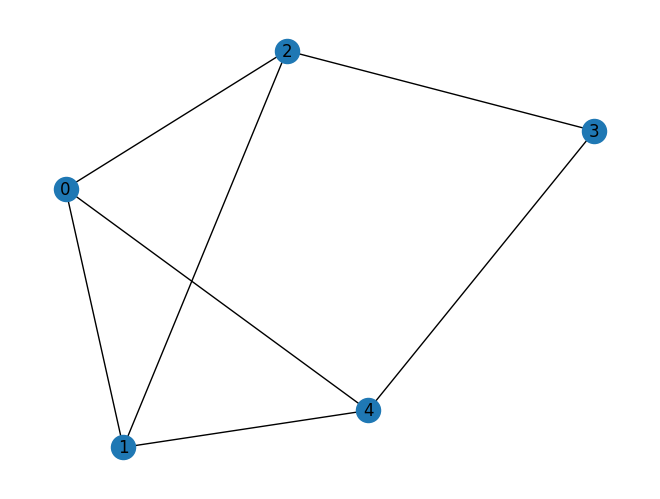

In [2]:
edges = [(0, 1), (1, 2), (2, 0), (2, 3),(0,4),(1,4),(3,4)]
graph = nx.Graph(edges)

nx.draw(graph, with_labels=True)
plt.show()

In [3]:
cost_h, mixer_h = qaoa.min_vertex_cover(graph, constrained=True)

print("Cost Hamiltonian", cost_h)
print("Mixer Hamiltonian", mixer_h)

Cost Hamiltonian   (-1) [Z0]
+ (-1) [Z1]
+ (-1) [Z2]
+ (-1) [Z3]
+ (-1) [Z4]
Mixer Hamiltonian   (0.125) [X0]
+ (0.125) [X1]
+ (0.125) [X2]
+ (0.125) [X4]
+ (0.25) [X3]
+ (-0.25) [X3 Z4]
+ (-0.25) [X3 Z2]
+ (-0.125) [X0 Z4]
+ (-0.125) [X0 Z2]
+ (-0.125) [X0 Z1]
+ (-0.125) [X1 Z4]
+ (-0.125) [X1 Z2]
+ (-0.125) [X1 Z0]
+ (-0.125) [X2 Z3]
+ (-0.125) [X2 Z0]
+ (-0.125) [X2 Z1]
+ (-0.125) [X4 Z3]
+ (-0.125) [X4 Z1]
+ (-0.125) [X4 Z0]
+ (0.125) [X0 Z2 Z4]
+ (0.125) [X0 Z1 Z4]
+ (0.125) [X0 Z1 Z2]
+ (0.125) [X1 Z2 Z4]
+ (0.125) [X1 Z0 Z4]
+ (0.125) [X1 Z0 Z2]
+ (0.125) [X2 Z0 Z3]
+ (0.125) [X2 Z1 Z3]
+ (0.125) [X2 Z1 Z0]
+ (0.125) [X4 Z1 Z3]
+ (0.125) [X4 Z0 Z3]
+ (0.125) [X4 Z0 Z1]
+ (0.25) [X3 Z2 Z4]
+ (-0.125) [X0 Z1 Z2 Z4]
+ (-0.125) [X1 Z0 Z2 Z4]
+ (-0.125) [X2 Z1 Z0 Z3]
+ (-0.125) [X4 Z0 Z1 Z3]


In [4]:
def qaoa_layer(gamma, alpha):
    qaoa.cost_layer(gamma, cost_h)
    qaoa.mixer_layer(alpha, mixer_h)

In [9]:
wires = range(5)
depth = 2

def circuit(params, **kwargs):
    for w in wires:
        qml.PauliX(wires=w)
    qml.layer(qaoa_layer, depth, params[0], params[1])


In [10]:
dev = qml.device("default.qubit", wires=wires)

@qml.qnode(dev)
def cost_function(params):
    circuit(params)
    return qml.expval(cost_h)

In [11]:
optimizer = qml.GradientDescentOptimizer()
steps = 70
params = np.array([[0.5, 0.5], [0.5, 0.5]], requires_grad=True)

In [12]:
for i in range(steps):
    params = optimizer.step(cost_function, params)

print("Optimal Parameters")
print(params)

Optimal Parameters
[[0.5        0.00291105]
 [0.71380392 0.49185974]]


In [13]:
@qml.qnode(dev)
def probability_circuit(gamma, alpha):
    circuit([gamma, alpha])
    return qml.probs(wires=wires)


probs = probability_circuit(params[0], params[1])

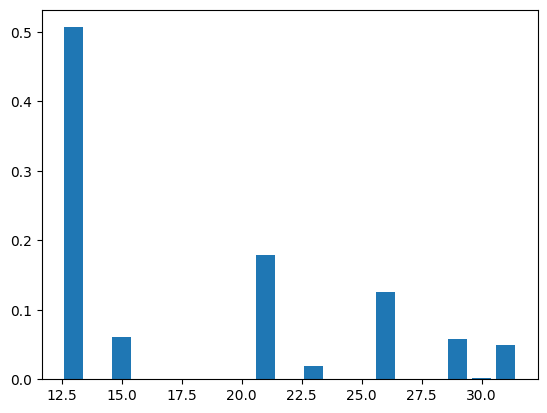

In [24]:

plt.bar(range(13,2 ** len(wires)), probs[13:32])
plt.show()


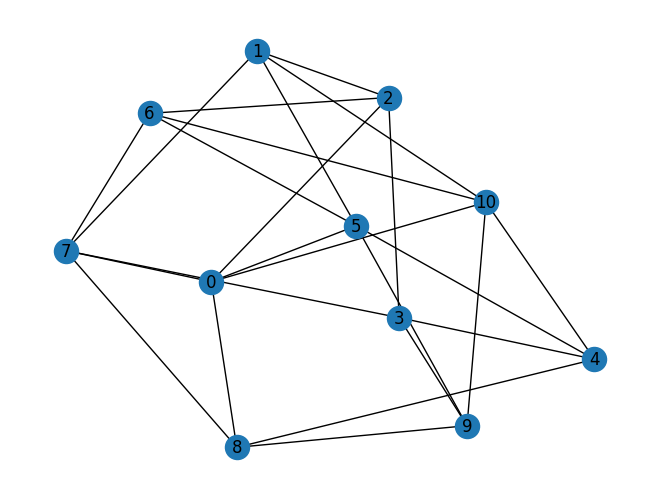

In [42]:
edges = [(1,2),(2,3),(3,4),(4,5),(5,1),(2,6),(5,6),(6,7),(6,10),(1,7),(3,7),(7,0),(7,8),(4,8),(8,0),(8,9),(3,9),(5,9),(9,10),(1,10),(4,10),(10,0),(2,0),(5,0)]
graph = nx.Graph(edges)

nx.draw(graph, with_labels=True)
plt.show()

In [43]:
cost_h, mixer_h = qaoa.min_vertex_cover(graph, constrained=True)

print("Cost Hamiltonian", cost_h)
print("Mixer Hamiltonian", mixer_h)

Cost Hamiltonian   (-1) [Z1]
+ (-1) [Z2]
+ (-1) [Z3]
+ (-1) [Z4]
+ (-1) [Z5]
+ (-1) [Z6]
+ (-1) [Z7]
+ (-1) [Z10]
+ (-1) [Z0]
+ (-1) [Z8]
+ (-1) [Z9]
Mixer Hamiltonian   (0.03125) [X5]
+ (0.03125) [X7]
+ (0.03125) [X10]
+ (0.03125) [X0]
+ (0.0625) [X1]
+ (0.0625) [X2]
+ (0.0625) [X3]
+ (0.0625) [X4]
+ (0.0625) [X6]
+ (0.0625) [X8]
+ (0.0625) [X9]
+ (-0.0625) [X1 Z10]
+ (-0.0625) [X1 Z7]
+ (-0.0625) [X1 Z5]
+ (-0.0625) [X1 Z2]
+ (-0.0625) [X2 Z0]
+ (-0.0625) [X2 Z6]
+ (-0.0625) [X2 Z3]
+ (-0.0625) [X2 Z1]
+ (-0.0625) [X3 Z9]
+ (-0.0625) [X3 Z7]
+ (-0.0625) [X3 Z4]
+ (-0.0625) [X3 Z2]
+ (-0.0625) [X4 Z10]
+ (-0.0625) [X4 Z8]
+ (-0.0625) [X4 Z5]
+ (-0.0625) [X4 Z3]
+ (-0.0625) [X6 Z10]
+ (-0.0625) [X6 Z7]
+ (-0.0625) [X6 Z5]
+ (-0.0625) [X6 Z2]
+ (-0.0625) [X8 Z9]
+ (-0.0625) [X8 Z0]
+ (-0.0625) [X8 Z4]
+ (-0.0625) [X8 Z7]
+ (-0.0625) [X9 Z10]
+ (-0.0625) [X9 Z5]
+ (-0.0625) [X9 Z3]
+ (-0.0625) [X9 Z8]
+ (-0.03125) [X5 Z0]
+ (-0.03125) [X5 Z9]
+ (-0.03125) [X5 Z6]
+ (-0.03125) [X5 Z1]
+ (

In [44]:
def qaoa_layer(gamma, alpha):
    qaoa.cost_layer(gamma, cost_h)
    qaoa.mixer_layer(alpha, mixer_h)

In [46]:
wires = range(11)
depth = 2

def circuit(params, **kwargs):
    for w in wires:
        qml.PauliX(wires=w)
    qml.layer(qaoa_layer, depth, params[0], params[1])


In [47]:
dev = qml.device("default.qubit", wires=wires)

@qml.qnode(dev)
def cost_function(params):
    circuit(params)
    return qml.expval(cost_h)

In [48]:
optimizer = qml.GradientDescentOptimizer()
steps = 70
params = np.array([[0.5, 0.5], [0.5, 0.5]], requires_grad=True)

In [49]:
for i in range(steps):
    params = optimizer.step(cost_function, params)

print("Optimal Parameters")
print(params)

Optimal Parameters
[[5.00000000e-01 2.20005693e-05]
 [9.07975247e-01 3.91928024e-01]]


In [50]:
@qml.qnode(dev)
def probability_circuit(gamma, alpha):
    circuit([gamma, alpha])
    return qml.probs(wires=wires)


probs = probability_circuit(params[0], params[1])

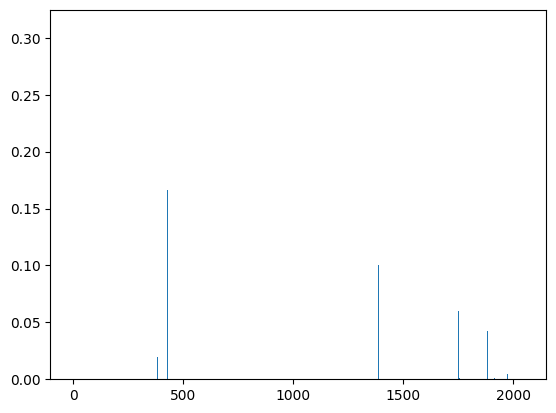

In [55]:

plt.bar(range(2 ** len(wires)), probs)
plt.show()


In [62]:
np.max(probs)

tensor(0.30923378, requires_grad=True)

In [64]:
np.argmax(probs)

367

In [66]:
bin(367)[2:]

'101101111'